# Linear regression with tensor flow 2
---

## __INTRODUCTION__  

### __ARTIFICIAL NEURAL NETWORKS__
* ML models that have a graph structure,inspired by the brain structure, with many interconnected units called artificial naurons https://www.youtube.com/watch?v=3JQ3hYko51Y
* ANN  have the ability to learn from raw data imputs, but it also makes them slower    
             
### __TENSORFLOW__
* CREATED AND MAINTAINED BY GOOGLE, 
* Different APIs (Application Programming Interface)
    * (a) low level graph API 
    * (b) High level Keras API
* TF on GPUs
    * it requires different version of a library, 
    * available in conda,
        > conda install tensorflow-gpu==1.12.0 #or newer version
    * requires: compatible NVIDIA graphic card
    * list is available cards is here: https://developer.nvidia.com/cuda-gpus
                
### __COMPUTATION GRAPHS__
* basic concept used in TF to specify how different elements interact with eaxch other
        - example:
            + we wish to implement liear regression 
              y = ax + b, where a, abd b are the sloe and intercept parameters,
                                x asre imput data, 
                                y are predictions, that weill be used to compare with the output
                          y       (y without a hat) usunig huber loss
                           \        
             a              loss       - each node of the grath is a step in our computation     
              \            /           - in TF data values are called TENSORS (3D matrices)
               * -> + -> y^            - in TF we first define a graph, and then we feed the data flows 
              /     |                    through the graph
             x      b
    
    
    
    
### __LOSS FUNCTIONS__
* TF implements only basic set ot loss funcitons
* more can be added by hand, using numpy-like functions eg ,ean, sqrt etc..., chekck for names becuase these are a bit different then in numpy
* https://www.tensorflow.org/api_docs/python/tf/keras/losses

### __TF OPTIMAZERS__
* https://www.tensorflow.org/api_docs/python/tf/keras/optimizers#top_of_page

### __Code Examples__
* lin regression with tf2, from scratch https://towardsdatascience.com/get-started-with-tensorflow-2-0-and-linear-regression-29b5dbd65977
* classificaiton example: https://stackabuse.com/tensorflow-2-0-solving-classification-and-regression-problems/



In [1]:
import matplotlib.pyplot as plt # for making plots, 
import matplotlib as mpl # to get some basif functions, heping with plot mnaking
import numpy as np # support for multi-dimensional arrays and matrices
import pandas as pd # library for data manipulation and analysis
import random # functions that use and generate random numbers
import glob # lists names in folders that match Unix shell patterns
import re # module to use regular expressions, 
import os # allow changing, and navigating files and folders, 
import seaborn as sns # advance plots, for statistics,
import scipy.stats as stats  # library for statistics and technical programming, 
%matplotlib inline
%config InlineBackend.figure_format ='retina' # For retina screens (mac)

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__) 
print(keras.__version__) 

# pip install tensorflow
# pip show <pacdkage name> # to check if it is in place, and with what version
# pip install --upgrade tensorflow

2.9.1
2.9.0


---
## Example 1: Predict fuel efficiency
---

Tf2 ecode example provided by googly, code has my additional coment on several funcitons, and parameters   
Source: https://www.tensorflow.org/tutorials/keras/regression   
Data: https://archive.ics.uci.edu/ml/datasets/auto+mpg   
Usefull links:   
* keras tutorials: https://www.tensorflow.org/tutorials/keras/classification
* keras sequencial model: https://www.tensorflow.org/guide/keras/sequential_model


### load data
Auto MPG dataset and demonstrates how to build models to predict the fuel efficiency of the late-1970s and early 1980s automobiles. it provides description of many automobiles from that time period like cylinders, displacement, horsepower, producer, and car weight.

In [61]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [63]:
dataset = raw_dataset.copy()
print(dataset.shape)
dataset.tail()

(398, 8)


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [43]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [64]:
# remove missing data
dataset = dataset.dropna()
print(dataset.shape)

# get dummies, for origine feature
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.tail()

(392, 8)


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,1,2,3
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0,1,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,0,0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1,0,0


#### Prepare the data for ML model

In [69]:
# create train/test data
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

# remove labels into separate vectors
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

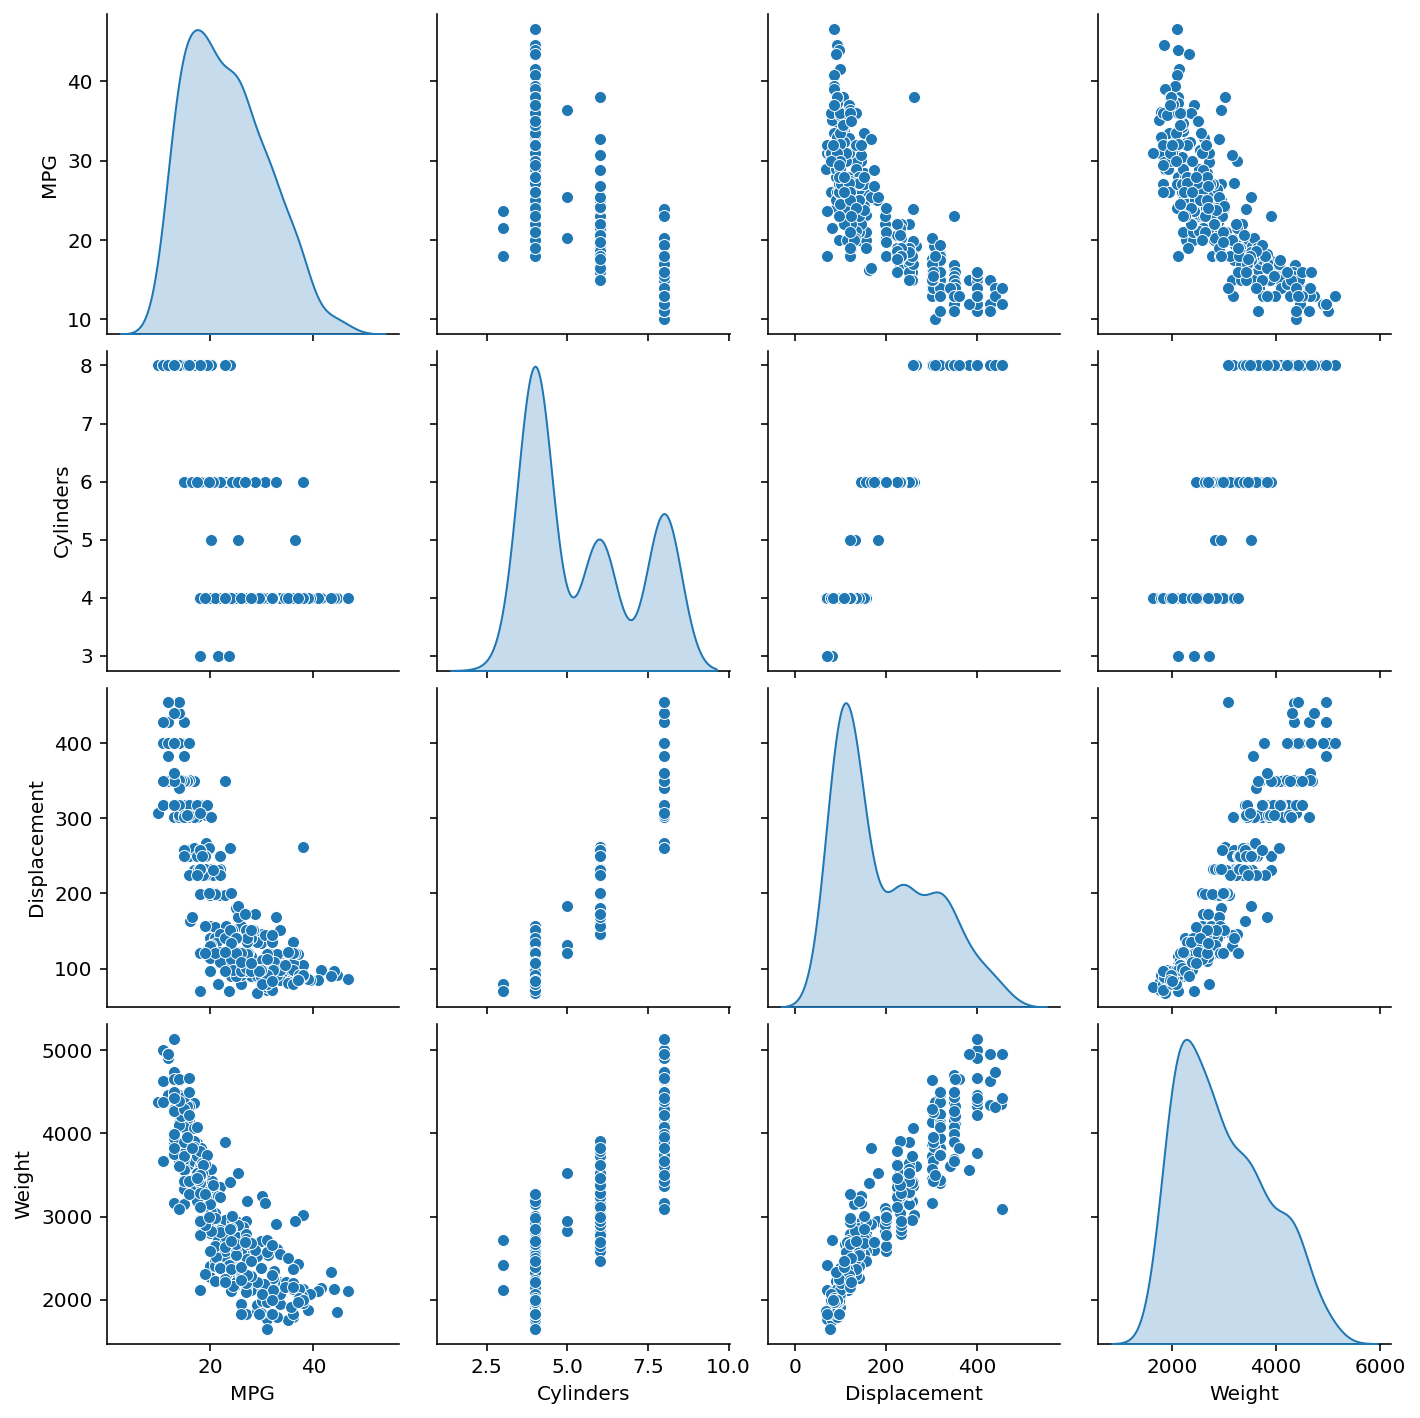

In [68]:
# evaluate numeric features
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

In [48]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
1,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
2,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
3,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


#### NORMALIZATION
You can use The Normalization layer with tf.keras.layers.Normalization 
- clean and simple way to add feature normalization into your model.
- Calculate the mean and variance, and store them in the layer
- it can also be done with sklearn functions, that I preffer, 


In [76]:
# create normalizing layer
''' axis-1: so the last axis in input data is the feature axis, 
    eg (1000, 12), 12 features and 1000 samples
'''
normalizer = tf.keras.layers.Normalization(axis=-1)

#  fit the state of the preprocessing layer
'''can be done also with sequencial model'''
normalizer.adapt(np.array(train_features))

# Calculate the mean and variance, and store them in the layer:
print(normalizer.mean.numpy())

[[5.47770691e+00 1.95318497e+02 1.04869446e+02 2.99025171e+03
  1.55592356e+01 7.58980942e+01 6.24203861e-01 1.78343967e-01
  1.97452217e-01]]


In [75]:
# When the layer is called, it returns the input data, with each feature independently normalized:
first_row = np.array(train_features[:1])
with np.printoptions(precision=2, suppress=True): # If True, always print floating point numbers
  print('First example:', first_row)
  print('Normalized:', normalizer(first_row).numpy())

First example: [[   4.    90.    75.  2125.    14.5   74.     1.     0.     0. ]]
Normalized: [[-0.87 -1.01 -0.79 -1.03 -0.38 -0.52  0.78 -0.47 -0.5 ]]


#### __LINEAR REGRESSION__
* starts by defining the model architecture. 
* __tf.keras.Sequential model__, 
    * represents a sequence of steps.
    * __Input shape__; N-D tensor with shape: (batch_size, ..., input_dim). The most common situation would be a 2D input with shape (batch_size, input_dim).
    * __Output shape__; N-D tensor with shape: (batch_size, ..., units). For instance, for a 2D input with shape (batch_size, input_dim), the output would have shape (batch_size, units).
* fucntions  
    * Sequencial: 
    * Dense: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
    * activations for dense layer: https://keras.io/api/layers/activations/
    




#### (a) Single indeoendent variable 
* Independet var: 'Horsepower'
* dependent/target var: 'MPG' - mean power generated
* Steps:
    * Normalize input features
        * use tf.keras.layers.Normalization preprocessing layer.
    * Apply a linear transformation
        * produce 1 output using a linear layer
        * use tf.keras.layers.Dense
    * The number of inputs (samplenr/batch, feature nr.)
        * set by the input_shape argument, 
        * or automatically when the model is run for the first time.

In [84]:
# create feature 
'''use sklearn make_pipeline to clean, the data, and prep. each feature automatically'''
input_data = np.array(train_features['Horsepower'])

# instantiate and fit normalizing layer
input_data_normalizer = layers.Normalization(input_shape=[1,], axis=None)
input_data_normalizer.adapt(input_data)

In [89]:
# Build the Keras Sequential model:
''' units - dimensionality of the output space.
    activation - if none specified, it will use "linear" activation: a(x)=x., 
    otherwise it may be 'relu', 'sigmoig', 'tanth'
'''
model = tf.keras.Sequential([
    input_data_normalizer,
    layers.Dense(units=1) # units - dimensionality of the output space.
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_11 (Normaliza  (None, 1)                3         
 tion)                                                           
                                                                 
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


configure the training procedure using the Keras Model.compile method. The most important arguments to compile are the loss and the optimizer, since these define what will be optimized (mean_absolute_error) and how (using the tf.keras.optimizers.Adam).
#### __OPTIMIZERS__:
* Sourses_
    * nice description of many optimizers used for NN https://ruder.io/optimizing-gradient-descent/index.html#rmsprop
    * SDG with momentum: https://machinelearningmastery.com/gradient-descent-with-momentum-from-scratch/
* optimizers - my notes, 
    * ADAM OPTIMIZER; stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
    * SGD; you need to specify learning rate and momentum, https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD
    * other Adamgrad, Adamax, RMSprop
    
    
#### __LOSS FUCNTIONS__


In [90]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [92]:
# Use Keras Model.fit to execute the training for 100 epochs:
%time
history = model.fit(
    train_features['Horsepower'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 16.9 µs


In [93]:
# Visualize the model's training progress using the stats stored in the history object:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.806568,4.180535,95
96,3.801982,4.204547,96
97,3.803976,4.203052,97
98,3.802107,4.181592,98
99,3.804686,4.173223,99


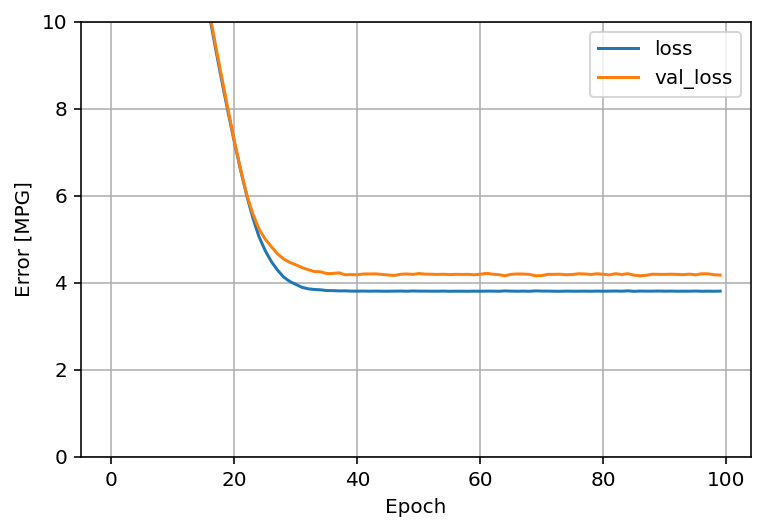

In [94]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

plot_loss(history)




### regression example with 3 different output variables
https://machinelearningmastery.com/deep-learning-models-for-multi-output-regression/

In [21]:

# use mlp for prediction on multi-output regression
import pandas as pd
from numpy import asarray
from sklearn.datasets import make_regression
from keras.models import Sequential
from keras.layers import Dense
 
# get the dataset
def get_dataset():
	X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, n_targets=3, random_state=2)
	return X, y
 
# get the model
def get_model(n_inputs, n_outputs):
	model = Sequential()
	model.add(Dense(units=20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
	model.add(Dense(units=n_outputs, kernel_initializer='he_uniform'))
	model.compile(loss='mae', optimizer='adam', metrics=["mae"])
	return model
 
# load dataset
X, y = get_dataset()
n_inputs, n_outputs = X.shape[1], y.shape[1]
# get model
model = get_model(n_inputs, n_outputs)
# fit the model on all data
history = model.fit(X, y, verbose=0, epochs=100)
# make a prediction for new data
row = [-0.99859353,2.19284309,-0.42632569,-0.21043258,-1.13655612,-0.55671602,-0.63169045,-0.87625098,-0.99445578,-0.3677487]
newX = asarray([row])
yhat = model.predict(newX)
print('Predicted: %s' % yhat[0])

1/1 [==============================] - 0s 30ms/step
Predicted: [-143.65176   -83.245155  -93.76801 ]


In [23]:
pd.DataFrame(history.history).head() # history is created for all variables together, 

,loss,mae
0,66.903069,66.903069
1,66.754700,66.754700
2,66.596054,66.596054
3,66.416588,66.416588
4,66.212280,66.212280
